In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline
import seaborn as sns
import re

In [ ]:
import os
os.chdir('/Lending/Data')

In [2]:
import Module.Loan_Modules

# Loan data

In [5]:
# 2020
loan_data_2020 = pd.read_csv('loan_2020.csv')
# 2019
loan_data_2019 = pd.read_csv('loan_historical.csv')

/home/yingjie/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (20,25,30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Additional dataset

In [6]:
zip_income = pd.read_csv('Zip_Income.csv')

In [7]:
state_unemployment = pd.read_csv('State_Unemployment.csv')

In [8]:
mortgage_rate_monthly = pd.read_csv('mortgage_rate.csv')

# Check data info 
20 objects, 88 numeric

In [9]:
loan_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891367 entries, 0 to 1891366
Columns: 108 entries, totcollamt to loanstatus
dtypes: float64(87), object(21)
memory usage: 1.5+ GB


In [10]:
loan_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 106 entries, emplength to secapprevolutil
dtypes: float64(30), int64(63), object(13)
memory usage: 27.4+ KB


In [11]:
loan_data_2019.columns

Index(['totcollamt', 'totalrevhilim', 'emplength', 'zipcode', 'numiltl',
       'collections12mthsexmed', 'memberid', 'numbctl', 'mortacc', 'openrv12m',
       ...
       'openacc', 'openil24m', 'percentbcgt75', 'maxbalbc', 'grade',
       'secappcollections12mthsexmed', 'pubrecbankruptcies', 'ficorangelow',
       'issued', 'loanstatus'],
      dtype='object', length=108)

In [12]:
loan_data_2020.columns

Index(['emplength', 'openil24m', 'percentbcgt75', 'homeownership', 'memberid',
       'mthssincelastrecord', 'secappchargeoffwithin12mths', 'bcopentobuy',
       'numoprevtl', 'zipcode',
       ...
       'secappopenacc', 'mosinoldrevtlop', 'openacc6m', 'numactvbctl', 'id',
       'secappmortacc', 'openrv24m', 'annualincjoint', 'mosinrcnttl',
       'secapprevolutil'],
      dtype='object', length=106)

In [13]:
loan_data_2019['trainflag'] = 1
loan_data_2020['trainflag'] = 0

In [14]:
loan_data = pd.concat([loan_data_2019, loan_data_2020], axis=0)

/home/yingjie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Merge loan data and additional data set

In [15]:
zip_income.loc[:, 'Zip'] = zip_income['Zip'].apply(lambda x: str(x)[:3])

In [16]:
zip_income.head()

,Zip,Zip_Median,Zip_Mean,Zip_Pop
0,100,"56,663","66,688","16,445"
1,100,"49,853","75,063","28,069"
2,100,"28,462","35,121","8,491"
3,100,"75,423","82,442","4,798"
4,100,"79,076","85,802","12,962"


In [17]:
feature_removeString = {'Zip_Median': [','], 'Zip_Mean': [',', '.'], 'Zip_Pop': [',']}
Loan_Modules.convert_categorical_numerical(zip_income, feature_removeString)

In [18]:
zip_income[['Zip_Median', 'Zip_Mean','Zip_Pop']] = zip_income[['Zip_Median', 'Zip_Mean','Zip_Pop']].astype('float')

In [19]:
zip_income.head()

,Zip,Zip_Median,Zip_Mean,Zip_Pop
0,100,56663.0,66688.0,16445.0
1,100,49853.0,75063.0,28069.0
2,100,28462.0,35121.0,8491.0
3,100,75423.0,82442.0,4798.0
4,100,79076.0,85802.0,12962.0


In [20]:
zipIncome = zip_income.groupby('Zip').agg({'Zip_Median': ['mean', 'min', 'max']
                              ,'Zip_Mean': ['mean', 'min', 'max']
                              ,'Zip_Pop': ['mean', 'min', 'max']})#.reset_index()
zipIncome.columns = ['Zip_Median_mean', 'Zip_Median_min', 'Zip_Median_max'
                    ,'Zip_Mean_mean', 'Zip_Mean_min', 'Zip_Mean_max'
                    ,'Zip_Pop_mean', 'Zip_Pop_min', 'Zip_Pop_max']
zipIncome = zipIncome.reset_index()

In [21]:
zipIncome.head()

,Zip,Zip_Median_mean,Zip_Median_min,Zip_Median_max,Zip_Mean_mean,Zip_Mean_min,Zip_Mean_max,Zip_Pop_mean,Zip_Pop_min,Zip_Pop_max
0,100,72289.326531,23302.0,145459.0,111245.122449,35121.0,256236.0,30388.836735,1.0,96117.0
1,101,75151.545455,36578.0,105187.0,109753.818182,46179.0,180473.0,8132.636364,1.0,59434.0
2,102,70742.625000,50058.0,104405.0,91454.250000,58516.0,143247.0,8670.000000,2.0,29626.0
3,103,67986.238095,46260.0,92781.0,81923.190476,65695.0,110791.0,22052.380952,498.0,85260.0
4,104,34723.500000,1520.0,61446.0,44544.653846,1673.0,79167.0,51346.500000,109.0,94492.0


In [22]:
state_unemployment.head()

,State,19_Unemploy,18_Unemploy
0,AL,3.9,3.0
1,SC,3.5,2.8
2,FL,3.6,3.1
3,GA,3.9,3.4
4,MA,3.4,2.9


In [23]:
mortgage_rate_monthly.head()

,Time,30_fixed_APR,15_fixed_APR,ARM_APR
0,Dec-2019,3.99%,3.56%,4.24%
1,Nov-2019,3.99%,3.56%,4.23%
2,Oct-2019,4.04%,3.56%,4.22%
3,Sep-2019,4.04%,3.59%,4.26%
4,Aug-2019,3.95%,3.49%,4.26%


## Check response variable: LoanStatus

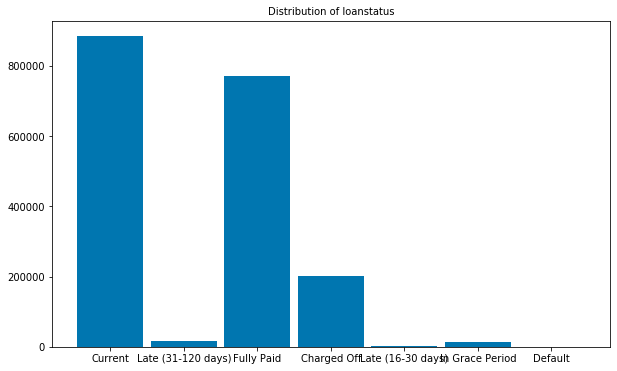

In [24]:
Loan_Modules.draw_hist_cat(df = loan_data, arr = 'loanstatus')

**For this project, we are only interested in 'Fully Paid' and 'Charged Off'**

In [25]:
df = loan_data.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' or trainflag == 0")

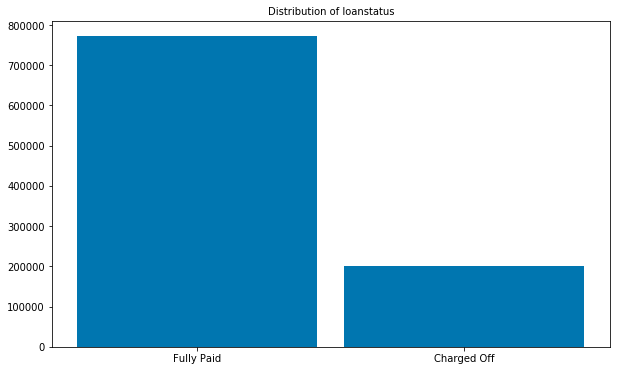

In [26]:
Loan_Modules.draw_hist_cat(df = df, arr = 'loanstatus')

In [27]:
df.loc[:, 'loanstatus'] = df['loanstatus'].map({'Charged Off': 1, 'Fully Paid': 0})

/home/yingjie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Find all numeric features, object features, and all NULL features

In [28]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in df.columns.tolist():
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [29]:
print('number of numeric features:', len(num_feature))
print('number of object features:', len(ob_feature))
print('number of NULL features:', len(all_null_feature))

number of numeric features: 89
number of object features: 20
number of NULL features: 0


In [30]:
num_feature.remove('trainflag')
num_feature

['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'fundedamnt',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'loanstatus',
 'maxbalbc',
 'memberid',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'ope

In [31]:
ob_feature = list(set(ob_feature) - set(['id', 'loanstatus']))
ob_feature

['grade',
 'desc',
 'verificationstatusjoint',
 'addrstate',
 'issued',
 'applicationtype',
 'purpose',
 'subgrade',
 'zipcode',
 'emplength',
 'term',
 'initialliststatus',
 'emptitle',
 'verificationstatus',
 'revolutil',
 'earliestcrline',
 'intrate',
 'secappearliestcrline',
 'homeownership']

### Drop columns with all NULLs

In [32]:
df.drop(all_null_feature, axis=1, inplace = True)

/home/yingjie/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Check missing values

In [33]:
feature_valuecnt = pd.DataFrame()
feature_valuecnt['features'] = df.columns.values
feature_valuecnt['null value cnt'] = df.isnull().sum().values
feature_valuecnt['null value pct'] = feature_valuecnt['null value cnt']/df.shape[0]

In [34]:
feature_valuecnt.sort_values(by = ['null value pct'], ascending = False)

,features,null value cnt,null value pct
14,desc,973514,0.999979
37,memberid,973501,0.999966
87,secappmthssincelastmajorderog,954528,0.980477
91,secapprevolutil,918578,0.943550
78,revolbaljoint,917641,0.942588
85,secappinqlast6mths,917640,0.942586
90,secappopenactil,917640,0.942586
84,secappficorangelow,917640,0.942586
83,secappficorangehigh,917640,0.942586
81,secappcollections12mthsexmed,917640,0.942586


From the histogram below, we can see that most of the features do not have NULL values <br>
For around **20** features, more than **70** percent of the values is NULL

In [35]:
feature_null = feature_valuecnt[feature_valuecnt['null value pct'] >= 0.7]

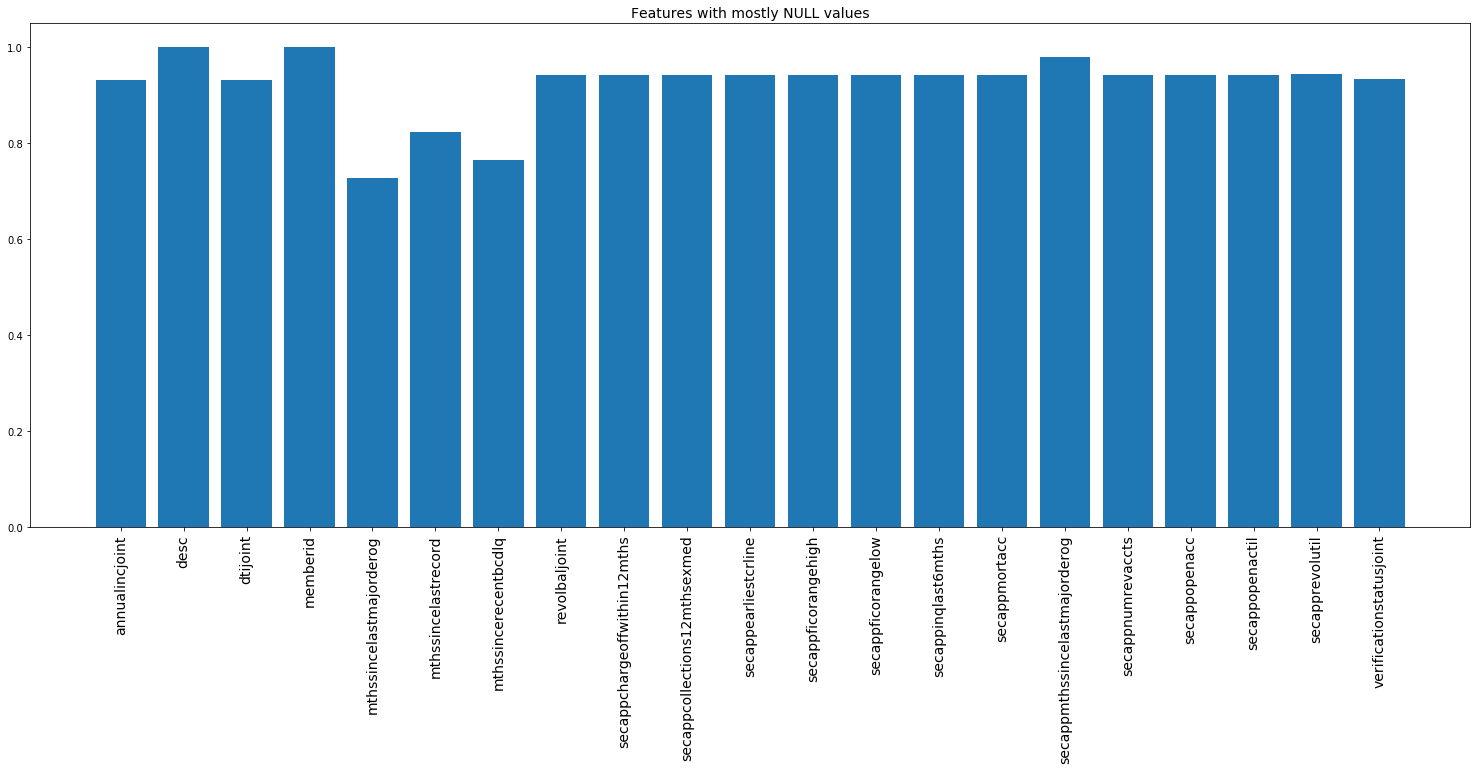

In [36]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(feature_null['features'],feature_null['null value pct'], align='center')
plt.xticks(rotation=90, fontsize=14)
plt.title('Features with mostly NULL values', fontsize=14)
plt.show()

## Drop those columns that have more than 70% NULL values

In [37]:
missing = feature_valuecnt['features'][feature_valuecnt['null value pct'] >= 0.7].tolist()
missing

['annualincjoint',
 'desc',
 'dtijoint',
 'memberid',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincerecentbcdlq',
 'revolbaljoint',
 'secappchargeoffwithin12mths',
 'secappcollections12mthsexmed',
 'secappearliestcrline',
 'secappficorangehigh',
 'secappficorangelow',
 'secappinqlast6mths',
 'secappmortacc',
 'secappmthssincelastmajorderog',
 'secappnumrevaccts',
 'secappopenacc',
 'secappopenactil',
 'secapprevolutil',
 'verificationstatusjoint']

In [38]:
df_copy = df.copy() ## make a copy of the current dataframe

In [39]:
df.drop(missing, axis=1, inplace=True)

/home/yingjie/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
num_feature = list(set(num_feature) - set(missing))
ob_feature = list(set(ob_feature) - set(missing))

## Categorical features

Remove **earliestcrline**, **issued**, **emplength**, **intrate**, **revolutil**, and **term** from categorical features and add to numerical features. <br>
Since these features should be converted to numerical features

In [41]:
num_ob_feature = ['earliestcrline', 'issued', 'emplength', 'intrate', 'revolutil', 'secappearliestcrline', 'term']
ob_feature_list = list(set(ob_feature) - set(num_ob_feature))

In [42]:
num_feature += num_ob_feature
num_feature

['inqlast6mths',
 'mosinrcnttl',
 'revolbal',
 'numrevtlbalgt0',
 'allutil',
 'numiltl',
 'numbcsats',
 'totcurbal',
 'mosinrcntrevtlop',
 'taxliens',
 'loanstatus',
 'numtl120dpd2m',
 'pubrec',
 'maxbalbc',
 'openil12m',
 'fundedamnt',
 'openacc6m',
 'totalilhighcreditlimit',
 'totalcutl',
 'bcutil',
 'chargeoffwithin12mths',
 'totalrevhilim',
 'openil24m',
 'inqlast12m',
 'mosinoldrevtlop',
 'installment',
 'totcollamt',
 'numrevaccts',
 'collections12mthsexmed',
 'pcttlnvrdlq',
 'ficorangehigh',
 'mosinoldilacct',
 'numactvbctl',
 'mthssincercntil',
 'annualinc',
 'totalbalil',
 'numactvrevtl',
 'mthssincelastdelinq',
 'bcopentobuy',
 'numoprevtl',
 'tothicredlim',
 'openacc',
 'totalbclimit',
 'mthssincerecentbc',
 'openactil',
 'loanamnt',
 'numtl90gdpd24m',
 'numsats',
 'totalacc',
 'ficorangelow',
 'accnowdelinq',
 'numtloppast12m',
 'openrv12m',
 'totalbalexmort',
 'accopenpast24mths',
 'avgcurbal',
 'delinqamnt',
 'mortacc',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',

In [43]:
ob_feature_list_1 = list(set(ob_feature_list) - set(['zipcode', 'emptitle']))
ob_feature_list_2 = ['zipcode', 'emptitle'] #zipcode and emptitle will be processed later

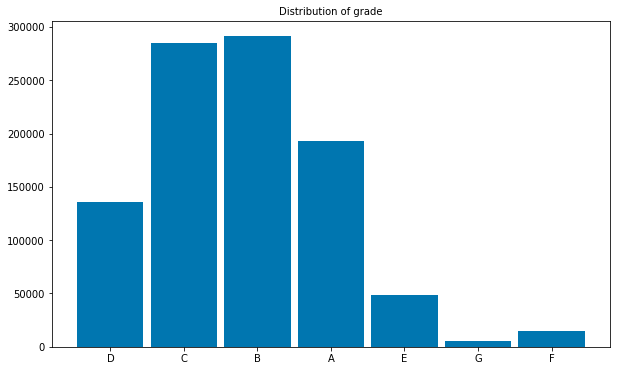

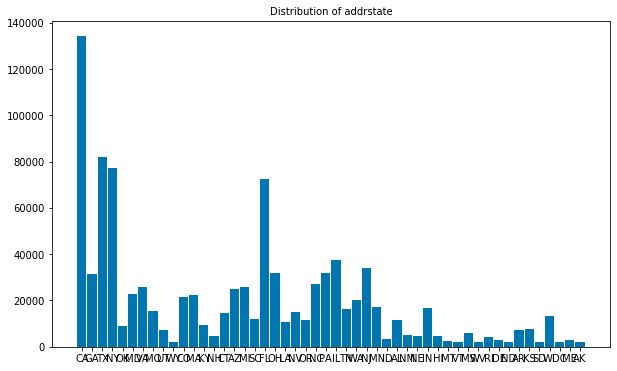

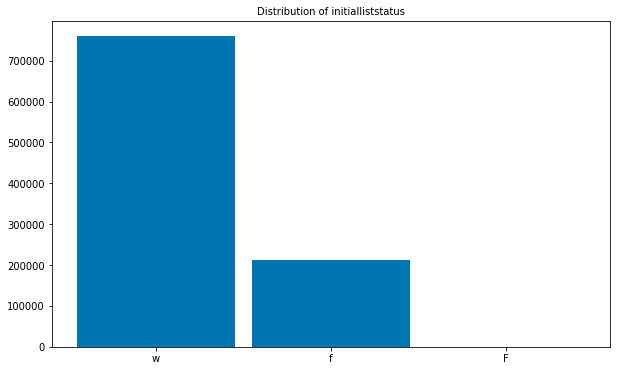

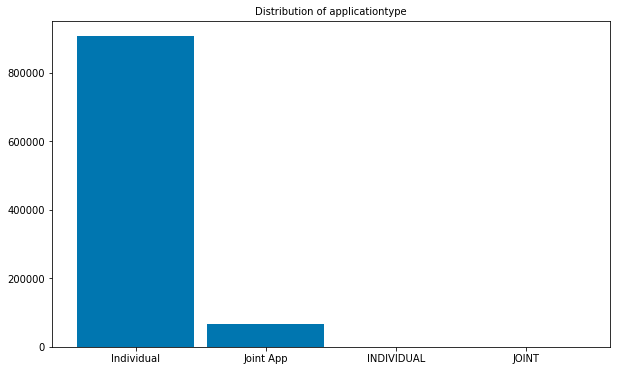

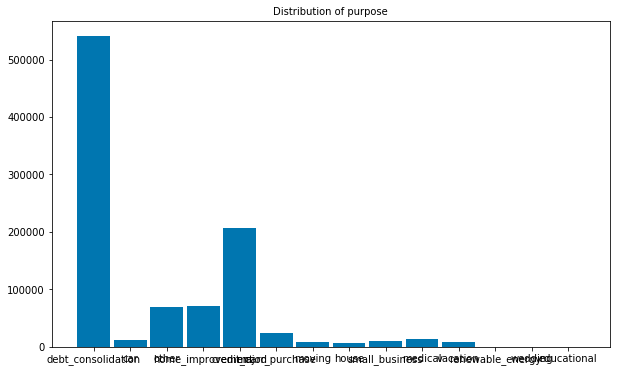

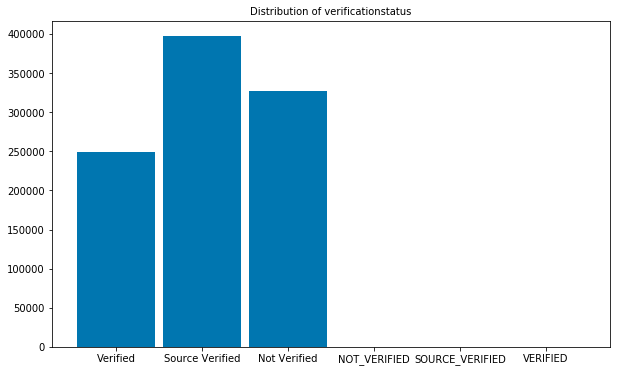

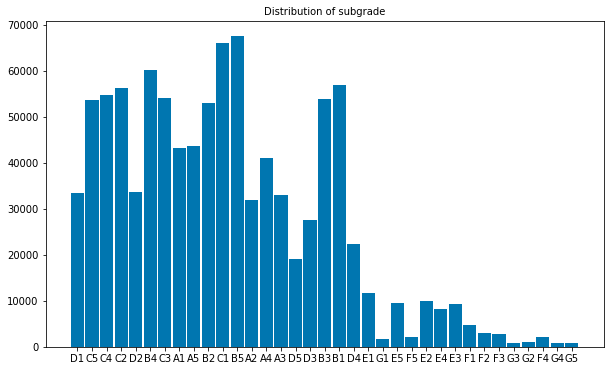

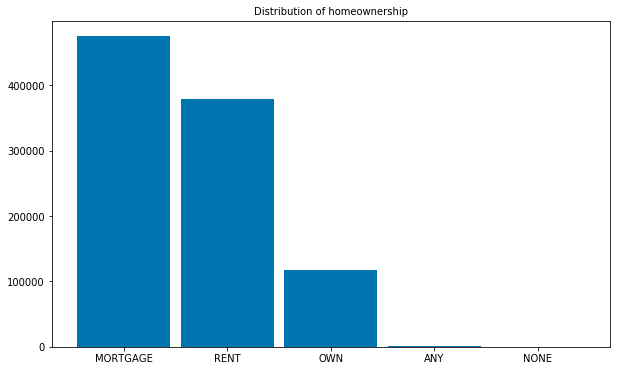

In [44]:
for ob_feature in ob_feature_list_1:
    Loan_Modules.draw_hist_cat(df = df, arr = ob_feature)

### Process the categorical features

#### Purpose
Combine 'major purchase', 'small business', 'car', 'medical', 'moving', 'house', 'vacation', 'renewable_energy' to 'other'

In [45]:
df.loc[df['purpose'].isin(['major_purchase', 'small_business', 'car', 'medical', 'moving', 'house', 'vacation', 'renewable_energy' ]), 'purpose'] = 'other'

/home/yingjie/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### subgrade
Combine E, F, G into Other

In [46]:
df.loc[df['subgrade'].isin(['E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3']), 'subgrade'] = 'other'

#### grade
Combine E, F, G into Other

In [47]:
df.loc[df['grade'].isin(['E', 'G', 'F']), 'grade'] = 'other'

#### initialliststatus
Combine F to f

In [48]:
df.loc[df['initialliststatus'] == 'F', 'initialliststatus'] = 'f'

#### addrstate
Combine addrstate with state unemployment

In [49]:
df = df.merge(state_unemployment, left_on = 'addrstate', right_on = 'State', how = 'left')

In [50]:
df.drop(columns = 'State', inplace = True)

#### verificationStatus
Combine 'Verified' and 'Source Verified'

In [51]:
df.loc[df['verificationstatus'] == 'NOT_VERIFIED', 'verificationstatus'] = 'Not Verified'
df.loc[df['verificationstatus'] == 'SOURCE_VERIFIED', 'verificationstatus'] = 'Verified'
df.loc[df['verificationstatus'] == 'VERIFIED', 'verificationstatus'] = 'Verified'
df.loc[df['verificationstatus'] == 'Source Verified', 'verificationstatus'] = 'Verified'

#### applicationtype
Combine 'INDIVIDUAL' to 'Individual' <br>
Combine 'JOINT' to 'Joint App' <br>

In [52]:
df.loc[df['applicationtype'] == 'INDIVIDUAL', 'applicationtype'] = 'Individual'
df.loc[df['applicationtype'] == 'JOINT', 'applicationtype'] = 'Joint App'

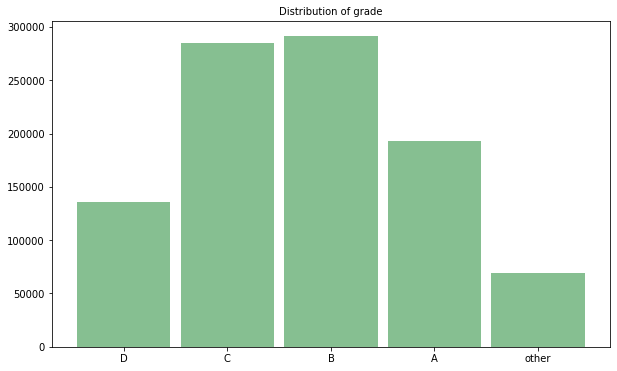

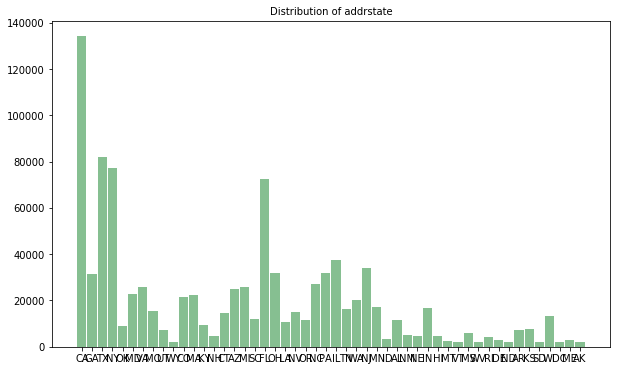

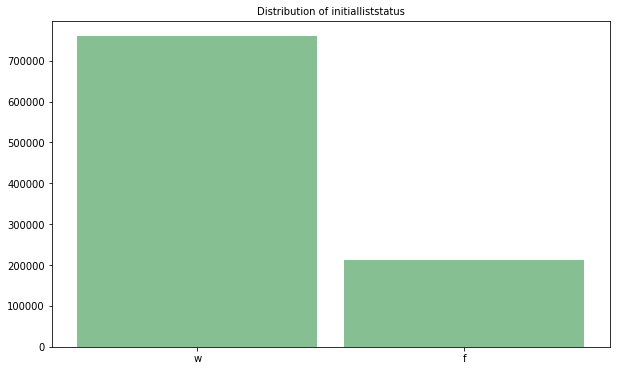

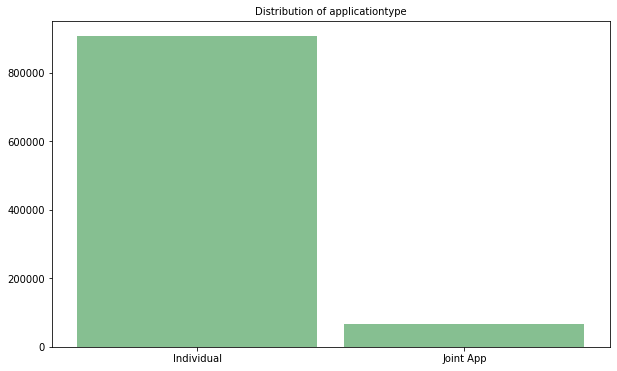

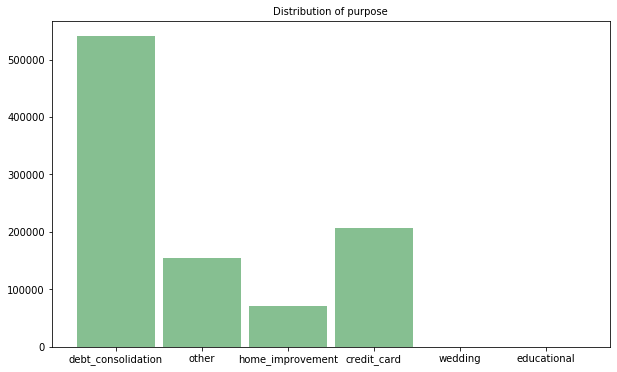

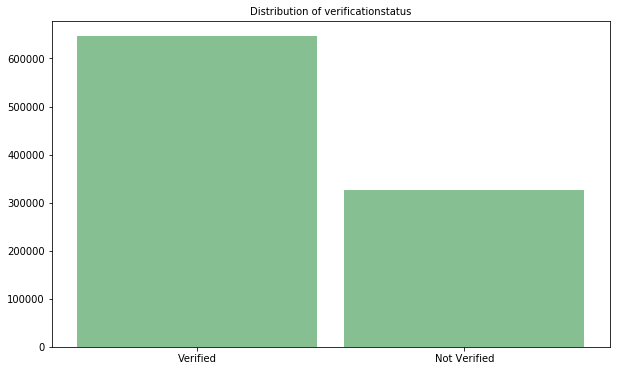

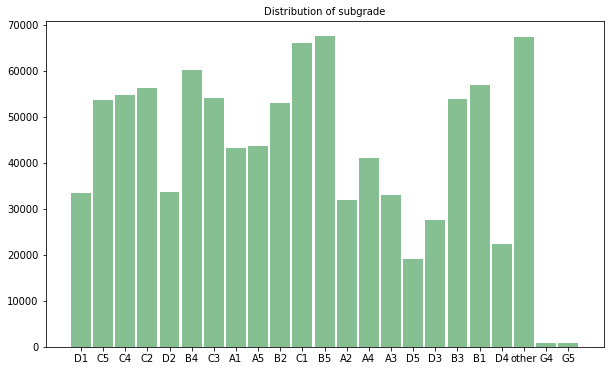

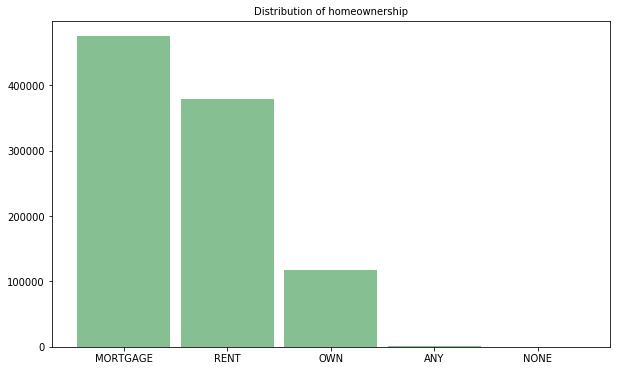

In [53]:
for ob_feature in ob_feature_list_1:
    Loan_Modules.draw_hist_cat(df = df, arr = ob_feature, change_color = 1)

#### zipcode -> zip_freq
Convert **zipcode** to **zipcode frequency**

In [54]:
df.loc[:, 'zipcode'] = df['zipcode'].apply(lambda x: str(x).replace('xx', ''))

In [55]:
zipcode_freq = pd.DataFrame()
zipcode_freq['zipcode'] = df.groupby('zipcode').sum()['loanstatus'].index
zipcode_freq['cnt'] = df.groupby('zipcode').sum()['loanstatus'].values
zipcode_freq['pct'] = (zipcode_freq['cnt']*10000/df[df['loanstatus'] == 1].shape[0]).round(2)

In [56]:
df.loc[:, 'zip_freq'] = df.merge(zipcode_freq, on = 'zipcode', how = 'left')['pct']

In [57]:
num_feature.append('zip_freq')

In [58]:
df = df.merge(zipIncome, left_on = 'zipcode', right_on = 'Zip', how = 'left')

In [59]:
df.drop(columns = 'Zip', inplace = True)

#### emptitle

In [60]:
df['emptitle'].unique().tolist()

['Administrative Assistant',
 'Warehouse employee',
 'Teacher',
 nan,
 'Security Guard',
 'Ramp Service',
 'Administrative Assistant and Book Keeper',
 'CLS',
 'Lead Technical Writer',
 'Supervisor',
 'Accountant',
 'Rapid ReHousing Case Manager',
 'VP of Sales',
 'Prod. Tech',
 'asst Supr',
 'Office Manager',
 'Business Intelligence Specialist',
 'AV Manager',
 'Accounts Payable',
 'Sr Cyber Security Analyst',
 'Security officer',
 'Administrative Assistant/Legal Secretary',
 'Chief Executive Officer',
 'Fresh',
 'finance shared services specialist 2',
 'Logistic Specialist',
 'Police Officer',
 'Sr Support Technical Analyst',
 'PSD Team ',
 'Consumer mortgage loan processor',
 'Service Technician',
 'Senior Director of Operations',
 'Maintenance',
 'Sushi Chef',
 'Sales',
 'Pricing Analyst',
 'Machinist',
 'Director',
 'Lab technician ',
 'Nurse Case Manager',
 'Mail Carrier',
 'Project Manager',
 'Director of Sales & Estimating',
 'Controller',
 'QA automation tester',
 'Maintenance

In [61]:
df.loc[~df['emptitle'].isnull(), 'emptitle_has'] = 1
df.loc[df['emptitle'].isnull(), 'emptitle_has'] = 0

#### further process emptitle
- Handwritten employment titles with typos. 
- Tested using TextBlob to correct typos but it did not acheive good performance (takes a long time and changed the correct spelling to a wrong one in many instances) 
- Instead, I performed rough manually processing here <br>
    - Combine some emptitle into more general ones <br>
    - For emptitle with many occurences, combine to minimize occurences with misspellings
    - Calculate per emptitle avg. charged-off rate by dividing the number of charge offs with the total occurence of the emptitle <br>
    - Create new feature **emptitle_chargeoff_pct** based on per emptitle avg. charged-off rate

In [62]:
# df.loc[:,'emptitle_clean'] = df['emptitle'].apply(lambda x: str(x))
# df['emptitle'].apply(lambda x: str(TextBlob(x).correct()))

In [63]:
# title_list = df['emptitle'].apply(lambda x: str(x).split())
df.loc[:, 'emptitle_2'] = df['emptitle'].apply(lambda x: str(x).lower())
regex = re.compile('[^a-zA-Z]')
df.loc[:, 'emptitle_2'] = df['emptitle_2'].apply(lambda x: regex.sub('nan', str(x)))
# df.loc[:, 'emptitle_2'] = df['emptitle_2'].apply(lambda x: regex.sub('nan', x))

In [64]:
def process_emptitle(df, feature_column, new_emptitle, expression):
    regex = '[a-z]*' + expression + '[a-z]*'
    df.loc[:, feature_column] = df[feature_column].apply(lambda x: new_emptitle if re.match(regex, x) else x)

In [65]:
emptitle_dict = {
    'creative': ['desi', 'creat', 'art', 'graph', 'musi', 'paint'], 
    'accountant': ['ac[a-z]*nt', 'ac[a-z]*tion', 'cpa', 'fin', 'tax', 'audit', 'assur', 'treasur', 'bank'],
    'manager': ['lead', 'm[a-z]*g', 'direc', 'sup[a-z]*vi', 'boss'],
    'executive': ['exe', 'cutive', 'chair', 'board', 'presid', 'ceo', 'coo', 'cto', 'cfo', 'cio', 'cmo', 'chief', 'vp'],
    'engineer': ['dev', 'e[a-z]*g[a-z]*r', 'coding', 'program', 'software', 'ux'],
    'technician': ['work', 'ian', 'cian', 'ican', 'can', 'tec', 'ele', 'ma[a-z]*ch', 'ma[a-z]*t', 'repair'],
    'health': ['hea[a-z]*th', 'pharm', 'med', 'nur', 'radio', 'cardio', 'doct'],
    'education': ['princi', 'dean', 'facul', 'schoo', 'acade', 'educ', 'teach'],
    'home': ['hous', 'home', 'wife'],
    'care': ['care', 'nanny', 'aid'],
    'military': ['marine', 'militar', 's[a-z]*arg', 'navy', 'arm', 'marsh'],
    'police': ['poli', 'li[a-z]*t[a-z]*n[a-z]*nt', 'deput', 'sheri'],
    'business': ['merch', 'bus', 'eco'],
    'entrepre': ['ent[a-z]*p', 'own', 'found'],
    'liason': ['lia', 'leai'],
    'agent': ['agen'],
    'architect': ['arch'],
    'operations': ['o[a-z]*era'],
    'admin': ['adm'],
    'partner': ['part'],
    'sales': ['sale'],
    'profession': ['prof'],
    'specialty': ['specia'],
    'secretary': ['secr'],
    'control': ['contr'],
    'department': ['depar'],
    'employee': ['emplo'],
    'analyst': ['assi', 'asso', 'ana[a-z]*l', 'consul'],
    'craftsman': ['man', 'ship', 'wood', 'carp', 'craft'],
    'worker': ['jani', 'wrap', 'writ', 'o[a-z]*ffi', 'mem', 'wait', 'train', 'pack', 'process', 'rece', 'recie', 
               'prod', 'pay', 'assem', 'bar', 'land', 'collec', 'driv', 'truck', 'load', 'ware']
}

In [66]:
feature_column = 'emptitle_2'
for key, value in emptitle_dict.items():
    new_emptitle = key
    expression_lst = value
    for e in expression_lst:
        process_emptitle(df, feature_column, new_emptitle, e)

In [67]:
emptitle = pd.DataFrame()
emptitle['emptitle_2'] = df.groupby('emptitle_2').sum()['loanstatus'].index
emptitle['cnt_chargedoff'] = df.groupby('emptitle_2').sum()['loanstatus'].values
emptitle['cnt_total'] = df.groupby('emptitle_2').size().values
emptitle['emptitle_chargeoff_pct'] = emptitle['cnt_chargedoff'] *100/ emptitle['cnt_total']

In [68]:
df.loc[df['emptitle_2']== '', 'emptitle_2'] = 'nan'
emptitle.loc[emptitle['emptitle_2']== '', 'emptitle_2'] = 'nan'

In [69]:
nan_avg = emptitle[emptitle['emptitle_chargeoff_pct'] < 100.00]['emptitle_chargeoff_pct'].mean()
print('avg chargeoff_pct without emptitle: ', nan_avg)

avg chargeoff_pct without emptitle:  6.449937296186774


In [70]:
emptitle.loc[emptitle['cnt_total'] < 3, 'emptitle_chargeoff_pct'] = nan_avg

Merge **df** with **emptitle**

In [71]:
df = df.merge(emptitle, on = 'emptitle_2', how = 'left')

Add **emptitle_chargeoff_pct** to numeric features

In [72]:
num_feature.append('emptitle_chargeoff_pct')

#### earliestcrline and issued to dates

In [73]:
df.loc[:, 'earliestcrline'] = pd.to_datetime(df['earliestcrline'])
df.loc[:, 'issued'] = pd.to_datetime(df['issued'])
df.loc[:, 'earliestcrline'] = df.loc[:, 'earliestcrline'].apply(lambda x: str(x)[:10])
df.loc[~df['issued'].isnull(), 'issued'] = df.loc[~df['issued'].isnull(), 'issued'].apply(lambda x: str(x)[:10])
df.loc[df['issued'].isnull(), 'issued'] = '2020-03-01'

In [74]:
from datetime import datetime
date_format = '%Y-%m-%d'
df.loc[:, 'earliestcrline'] = df.loc[:, 'earliestcrline'].apply(lambda x: datetime.strptime(str(x), date_format))
df.loc[:, 'issued'] = df.loc[:, 'issued'].apply(lambda x: (datetime.strptime(str(x), date_format)))

In [75]:
df.loc[:, 'diff_crline_issue'] = df.loc[:, 'issued'] - df.loc[:, 'earliestcrline']
df.loc[:, 'diff_crline_issue'] = df['diff_crline_issue'].apply(lambda x: x.days)

In [76]:
mortgage_rate_monthly['Time'] = pd.to_datetime(mortgage_rate_monthly['Time'])

In [77]:
mortgage_rate_monthly['Time'].head()

0   2019-12-01
1   2019-11-01
2   2019-10-01
3   2019-09-01
4   2019-08-01
Name: Time, dtype: datetime64[ns]

In [78]:
df['issued'].head()

0   2019-03-01
1   2019-03-01
2   2019-03-01
3   2019-03-01
4   2019-03-01
Name: issued, dtype: datetime64[ns]

In [79]:
df = pd.merge(df, mortgage_rate_monthly, left_on = 'issued', right_on = 'Time', how = 'left')

In [80]:
df.drop(columns = 'Time', inplace = True)

## Convert non-numerical features to numerical/dates

In [81]:
num_features = list(set(num_feature) - set(missing))
num_features = list(set(num_features) - set(['earliestcrline', 'issued']))
num_features += ['diff_crline_issue', 'Zip_Median_mean', 'Zip_Median_min', 'Zip_Median_max'
                    ,'Zip_Mean_mean', 'Zip_Mean_min', 'Zip_Mean_max'
                    ,'Zip_Pop_mean', 'Zip_Pop_min', 'Zip_Pop_max', '19_Unemploy', '18_Unemploy', '30_fixed_APR', '15_fixed_APR', 'ARM_APR']

### Remove unneeded characters from numerical value features

In [82]:
feature_removeString = {'revolutil': ['%'], 'term': ['months'], 'emplength': ['<', '+', 'years', 'year', 'nan'], \
                       'intrate': ['%'], '30_fixed_APR': ['%'], '15_fixed_APR': ['%'], 'ARM_APR': ['%'],         
                       }
Loan_Modules.convert_categorical_numerical(df, feature_removeString)

### Fill NaN with Median for numeric values
Most feature is right skewed so use Median instead Mean

In [83]:
df.loc[:, num_features] = df[num_features].apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x)

In [85]:
df[num_features].head()

,inqlast6mths,mosinrcnttl,revolbal,numrevtlbalgt0,allutil,numbcsats,numiltl,totcurbal,emplength,mosinrcntrevtlop,...,Zip_Mean_min,Zip_Mean_max,Zip_Pop_mean,Zip_Pop_min,Zip_Pop_max,19_Unemploy,18_Unemploy,30_fixed_APR,15_fixed_APR,ARM_APR
0,0.0,7.0,67035.0,6.0,78.0,5.0,7.0,271606.0,5,10.0,...,49482.0,112700.0,29381.333333,456.0,76615.0,4.3,4.0,4.39,3.91,4.87
1,0.0,7.0,2885.0,4.0,72.0,2.0,7.0,19021.0,3,7.0,...,40660.0,134286.0,36131.333333,342.0,80241.0,3.9,3.4,4.39,3.91,4.87
2,1.0,5.0,15299.0,5.0,89.0,4.0,36.0,124465.0,3,5.0,...,0.0,125882.0,10388.137255,18.0,44314.0,3.8,3.5,4.39,3.91,4.87
3,1.0,1.0,62675.0,10.0,76.0,8.0,14.0,230990.0,1,1.0,...,0.0,198977.0,35312.722222,550.0,75611.0,4.3,4.0,4.39,3.91,4.87
4,0.0,27.0,1719.0,4.0,69.0,4.0,0.0,1719.0,1,27.0,...,33975.0,140858.0,62714.333333,3040.0,106461.0,4.1,4.0,4.39,3.91,4.87


In [86]:
df.loc[:, num_features] = df.loc[:, num_features].astype('float')

In [87]:
# Convert emplength in test data to year instead of months
df.loc[df['trainflag'] == 0 ,'emplength'] = df.loc[df['trainflag'] == 0 ,'emplength']/12

## Check summary statistics of numeric features

In [88]:
df[num_features].describe()

,inqlast6mths,mosinrcnttl,revolbal,numrevtlbalgt0,allutil,numbcsats,numiltl,totcurbal,emplength,mosinrcntrevtlop,...,Zip_Mean_min,Zip_Mean_max,Zip_Pop_mean,Zip_Pop_min,Zip_Pop_max,19_Unemploy,18_Unemploy,30_fixed_APR,15_fixed_APR,ARM_APR
count,973534.000000,973534.000000,9.735340e+05,973534.000000,973534.000000,973534.000000,973534.000000,9.735340e+05,973534.000000,973534.000000,...,973534.000000,973534.000000,973534.000000,973534.000000,973534.000000,973534.000000,973534.000000,59183.000000,59183.000000,59183.000000
mean,0.545430,7.860628,1.585863e+04,5.373162,57.239605,4.771062,8.629747,1.446532e+05,5.525260,13.571040,...,33447.531272,149850.508080,18580.957744,705.096274,57209.158205,3.924728,3.682317,4.280916,3.793928,4.673702
std,0.832524,8.626248,2.284943e+04,3.285212,21.049242,3.135925,7.521861,1.639819e+05,3.808377,17.041783,...,15162.074203,58363.466601,11188.104736,2330.029984,20178.464181,0.512903,0.550574,0.216163,0.216257,0.282183
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,44241.000000,771.727273,1.000000,4098.000000,2.500000,2.400000,3.950000,3.490000,4.220000
25%,0.000000,3.000000,5.379000e+03,3.000000,43.000000,3.000000,4.000000,2.893000e+04,2.000000,4.000000,...,25986.000000,111029.000000,10023.166667,38.000000,43129.000000,3.600000,3.300000,4.060000,3.560000,4.410000
50%,0.000000,5.000000,1.043300e+04,5.000000,58.000000,4.000000,7.000000,8.016150e+04,5.000000,8.000000,...,34462.000000,137076.000000,17213.055556,92.000000,54926.000000,4.100000,3.700000,4.330000,3.860000,4.810000
75%,1.000000,10.000000,1.891100e+04,7.000000,72.000000,6.000000,11.000000,2.169088e+05,10.000000,17.000000,...,41865.000000,172658.000000,24793.105263,295.000000,67602.000000,4.300000,4.000000,4.490000,4.010000,4.940000
max,5.000000,382.000000,1.698749e+06,65.000000,204.000000,61.000000,159.000000,8.524709e+06,33.000000,438.000000,...,146355.000000,361842.000000,62714.333333,30322.000000,113916.000000,6.500000,6.100000,4.590000,4.090000,4.990000


### Remove features of low standard deviations

In [89]:
# remove 'accnowdelinq', 'collections12mthsexmed', \
# 'chargeoffwithin12mths', 'taxliens', 'numtl120dpd2m', and 'numtl90gdpd24m' becaue those features
# have extremely small standard deviation - not useful features

num_features = list(set(num_features) - set(['accnowdelinq', 'collections12mthsexmed', \
                            'chargeoffwithin12mths', 'taxliens', 'numtl120dpd2m', 'numtl90gdpd24m', 'numtl30dpd']))

## Plot numeric features

inqlast6mths


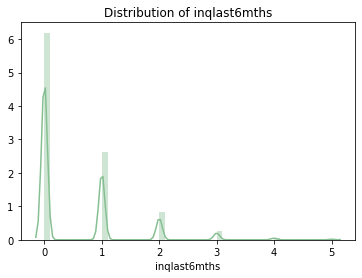

Zip_Pop_max


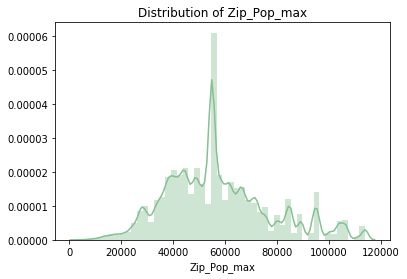

mosinrcnttl


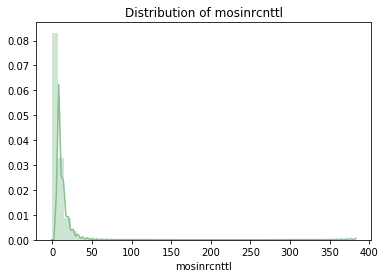

revolbal


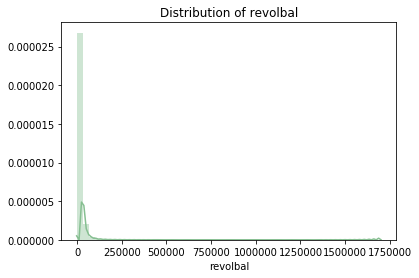

numrevtlbalgt0


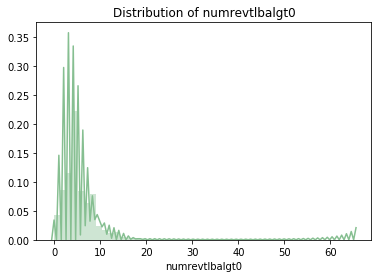

allutil


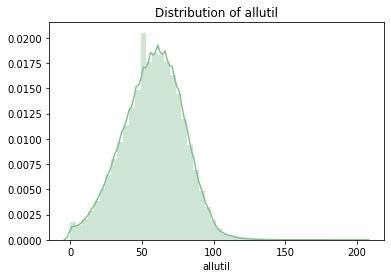

numiltl


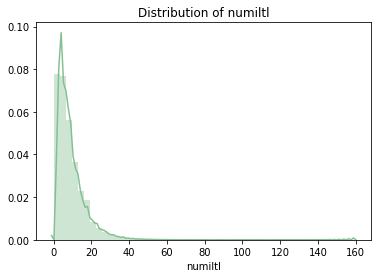

numbcsats


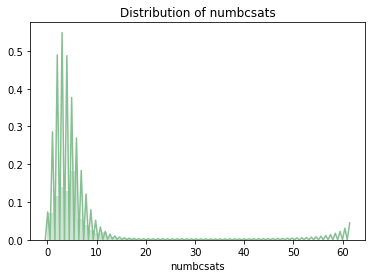

totcurbal


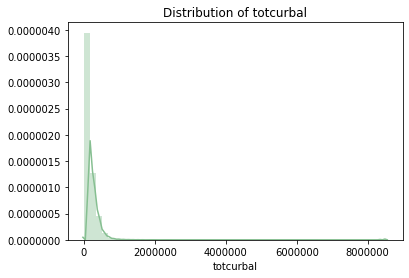

emplength


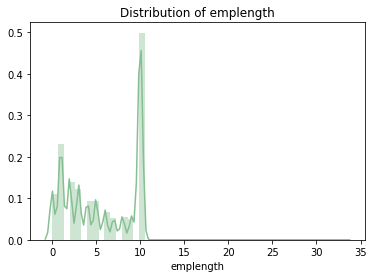

mosinrcntrevtlop


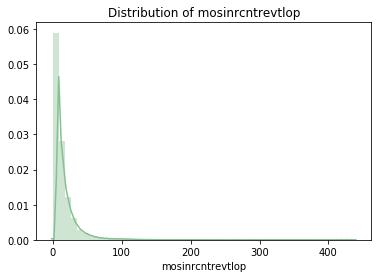

Zip_Pop_min


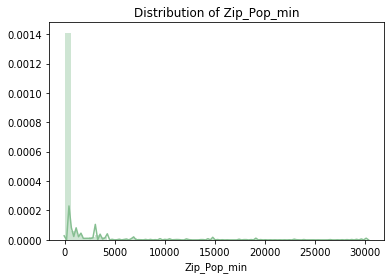

zip_freq


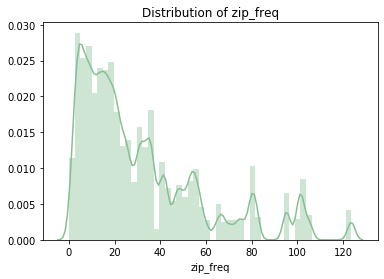

loanstatus


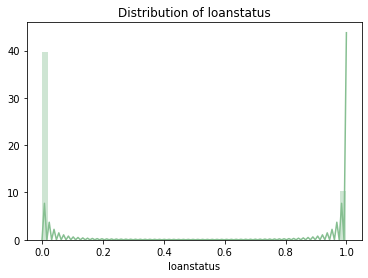

revolutil


/home/yingjie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/yingjie/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

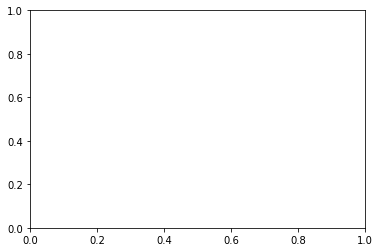

In [90]:
for num_feature in num_features:
    print(num_feature)
    sns.distplot(df[num_feature], color='#86bf91')
    plt.title('Distribution of {}'.format(num_feature))
    plt.show()

- Most of the features are right-skewed <br>
- No need to perform further processing here (e.g. standardization) because XGBoost will be used

## Plot numeric features correlations 

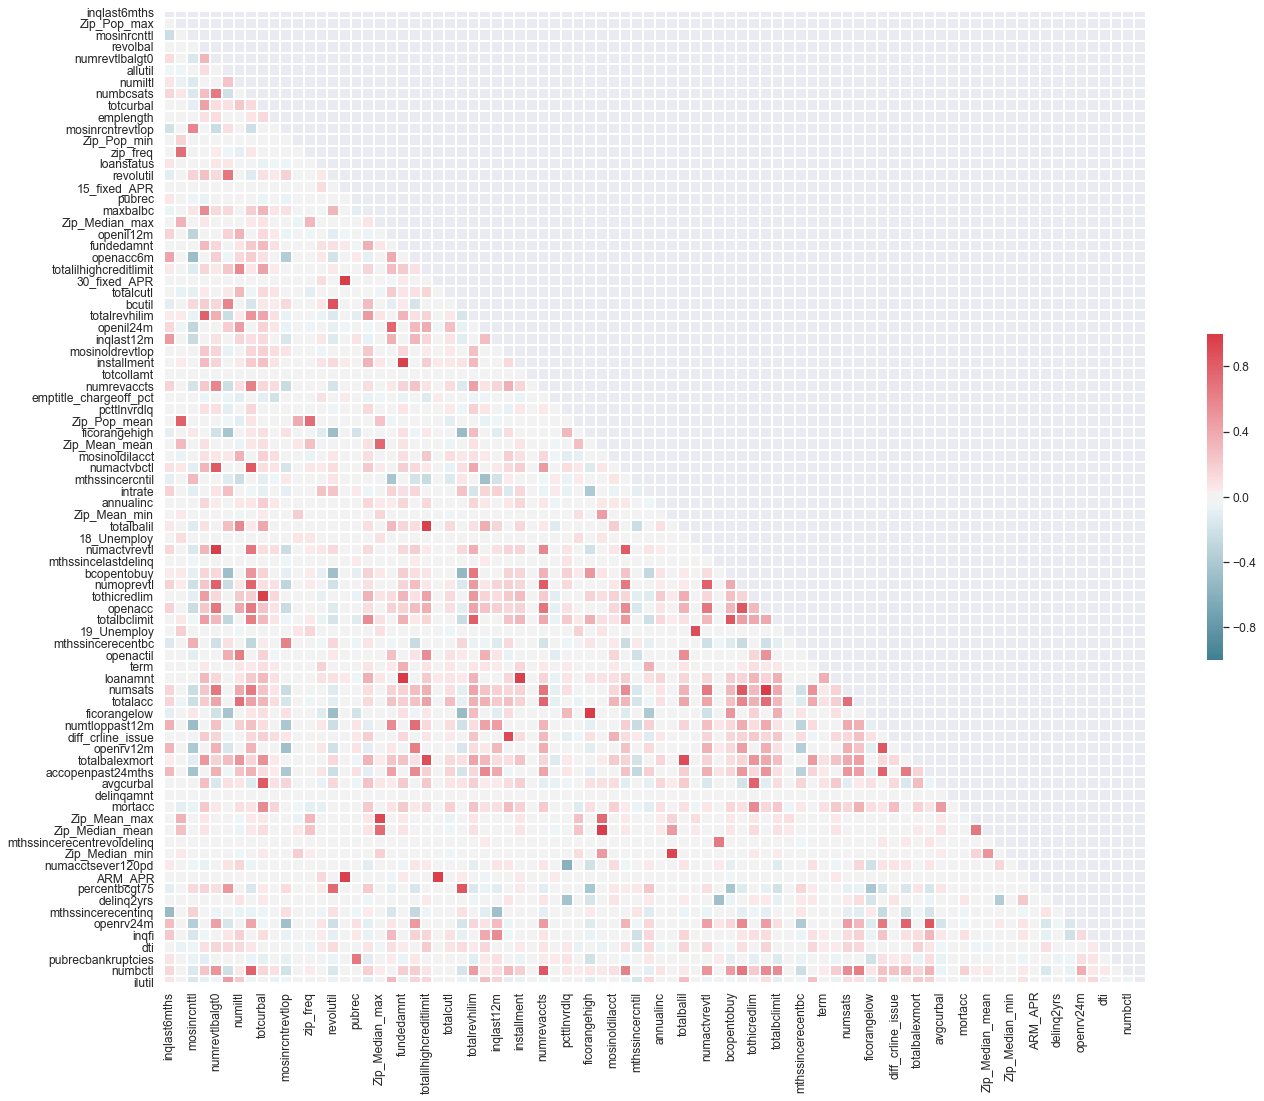

In [91]:
sns.set(font_scale= 1.1)
# Compute the correlation matrix
corr = df[num_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,center=0, fmt='.1f', vmin=-1, vmax=1,
            square=True, linewidths=1, cbar_kws={"shrink": .3})
plt.show()

# Save dataframe

In [92]:
processed_df = df[ob_feature_list_1+num_features+['issued', 'trainflag']]

In [93]:
processed_df.to_csv('processed_loan_data_v3.csv')

### loanstatus
Unbalanced dataset <br>
We can <br>
1) Undersampling 'Fully Paid' <br>
2) Oversampling 'Charged Off' <br>
3) SMOTE

or consider **boosting** model

In [ ]:
Loan_Modules.draw_hist_cat(df = processed_df, arr = 'loanstatus')

## Visualize interactions between predictors (X) and response variable (loanstatus)

In [ ]:
dummy_list = ['applicationtype', 'verificationstatus', 'homeownership', 'grade',
               'initialliststatus', 'purpose']
n = len(dummy_list)
print('{} dummy variables'.format(n))

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(30, 20), sharex=False)
for i, f in enumerate(dummy_list):
    sns.set(font_scale=2)
    sns.barplot(x=f, y='loanstatus', data=processed_df, ax=axes[i//3, i%3])
plt.tight_layout()

- Grade/Subgrade - **higher** default rate <br>
- Initailliststatus - no obvious difference <br>
- Purpose - debt_consolidation has **higher** default rate <br>
- Verification - Verified has **higher** default rate
- Homeownership - Mortgate has **lower** default rate 
- Applicationtype - Joint App has **higher** default rate <br>
- Lower Emplength - **higher** the default rate <br>
- Source Verified - **higher** default rate <br>

In [ ]:
processed_df.head()

In [ ]:
processed_df['loanstatus']

In [ ]:
continuous_list = list(set(processed_df.columns.tolist())-set(dummy_list)-set(['loanstatus']))
n = len(continuous_list)
print('{} continuous variables'.format(n))            

In [ ]:
continuous_list = ['avgcurbal', 'dti', 'ficorangelow', 'ilutil', 'inqfi', 'installment', 'intrate', 'maxbalbc'
                   , 'mosinoldilacct', 'mosinoldrevtlop', 'mthssincercntil', 'mthssincerecentbc'
                   , 'mthssincerecentinq', 'numrevtlbalgt0', 'openacc6m', 'openactil', 'revolutil', 'totalrevhilim']
n = len(continuous_list)
print('{} continuous variables'.format(n))

In [ ]:
f, axes = plt.subplots(6, 3, figsize=(100, 100), sharex=False)
fs = 50
x = range(5)
labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
for i, f in enumerate(continuous_list):
    Loan_Modules.countinuous_variable_plot(processed_df, f, i, fs)
    ax = axes[i//3, i%3]
    ax.set_xlabel("%s percentile" % f , fontsize = fs)
    ax.set_ylabel('Default Rate', fontsize = fs)
    plt.xticks(x, labels, rotation='0', fontsize = fs)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % f,fontsize = fs)
plt.tight_layout()

**High default rate** <br>

- higher dti <br>
- higher installment <br>
- higher intrate <br>
- higher mthssincercntil <br>
- higher numrevtlbalgt0 <br>
- higher revolutil <br>
<br>
- lower avgcurbal <br>
- lower ficorangelow <br>
- lower mosinoldilacct <br>
- lower mosinoldrevtlop <br>
- lower mthssincelastmajorderog <br>
- lower mthssincerecentinq <br>
- lower totalrevhilim <br>

**No obvious trend** <br> 
- ilutil, inqfi, maxbalbc, mthssincerecentbc, mthssincerecentinq, openacc6m, openactil, revolutil, totalrevhilim